# Importing Libraries

Please to check out my dataset [Word Cloud Images](https://www.kaggle.com/brendan45774/word-cloud-images) that I used for my images in this notebook!

In [ ]:
import numpy as np 
import pandas as pd 
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.ndimage import gaussian_gradient_magnitude
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Loading Data

In [ ]:
df = pd.read_csv('../input/baby-names/baby_names.csv')
df.head()

In [ ]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df)
from IPython.display import display
display(report)

In [ ]:
# Groupby by country
gender = df.groupby("Sex")

# Comparing Number of Gender Names

This shows us there are more male names than female names.

In [ ]:
plt.figure(figsize=(15,10))
gender.max().sort_values(by="Count",ascending=False)["Count"].plot.bar()
plt.xticks(rotation=30)
plt.xlabel("Number of Names")
plt.ylabel("Gender")
plt.show()

# Word Cloud Reference

In [ ]:
?WordCloud

# Finding the most popular name

In [ ]:
text = " ".join(review for review in df.Name)
print ("There are {} names in this dataset.".format(len(text)))


Finding what name is used the most. Jessie and Leslie looks like they are the most used names.

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50000, max_words=1000000, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Creating Images with Word Cloud

In [ ]:
bottle_mask = np.array(Image.open("../input/word-cloud-images/bottle.png"))
bottle_mask

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
transformed_bottle_mask = np.ndarray((bottle_mask.shape[0],bottle_mask.shape[1]), np.int32)
for i in range(len(bottle_mask)):
    transformed_bottle_mask[i] = list(map(transform_format, bottle_mask[i]))
    
# Check the expected result of your mask
transformed_bottle_mask

You need a black image to mask or it will look weird. I used a black baby bottle to create this.

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=100000, mask=transformed_bottle_mask,
                contour_width=1.5 , contour_color='dodgerblue')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[20,11])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Creating Word Cloud following a Color Pattern

This code takes images and takes text from the dataset and changes the colors to the image. The results of the shape might vary base on the image, but will have the color. 

You can concatenate all of the reviews using the " ".join(list) syntax, which joins all elements in a list separating them by whitespace. Bear has all the names for females and duck has names for males. And so on.

In [ ]:
bib = " ".join(review for review in df[df["Sex"]=="M"].Name)
bear = " ".join(review for review in df[df["Sex"]=="F"].Name)
blocks = " ".join(review for review in df[df["Sex"]=="M"].Name)
duck = " ".join(review for review in df[df["Sex"]=="M"].Name)
stroller = " ".join(review for review in df[df["Sex"]=="F"].Name)
#bear = ' '.join(df['Name'].tolist())
df.head()

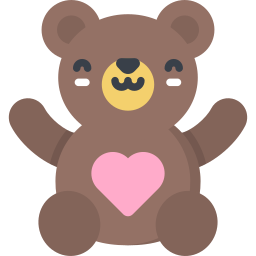

This created a word cloud that is the color brown because of the picture above.

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("../input/word-cloud-images/bear.png"))
wordcloud_bear = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(bear)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_bear.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("bear", dpi=125)

plt.show()

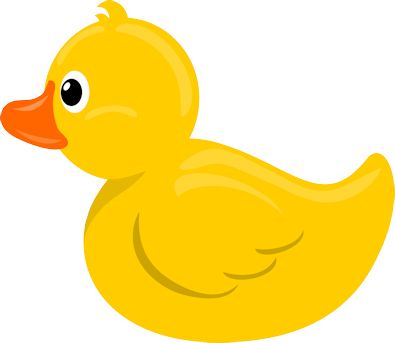

This takes the image from above with the color and shape.

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("../input/word-cloud-images/duck.jpg"))
wordcloud_duck = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(duck)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_duck.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("duck.png", dpi=125)

plt.show()

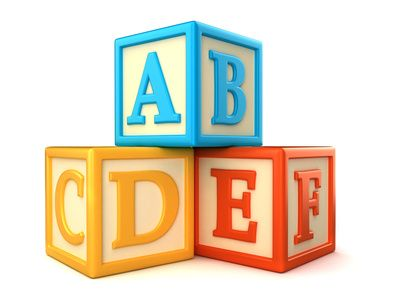

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("../input/word-cloud-images/blocks.jpg"))
wordcloud_blocks = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(blocks)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_blocks.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("blocks.png", dpi=125)

plt.show()

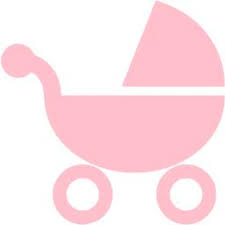

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("../input/word-cloud-images/stroller.jfif"))
wordcloud_stroller = WordCloud(background_color="black", mode="RGBA", max_words=1000, mask=mask).generate(stroller)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,7])
plt.imshow(wordcloud_stroller.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("stroller.png", dpi=125)

plt.show()

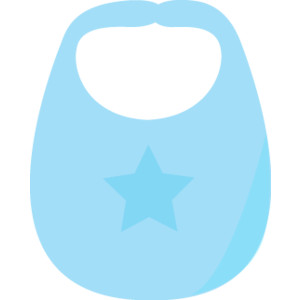

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("../input/word-cloud-images/bib.jfif"))
wordcloud_bib = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(bib)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_bib.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("bib.png", dpi=125)

plt.show()

# If you like this notebook, please an Upvote! Don't forget to check out my other notebooks too!

* [ConnectX Baseline](https://www.kaggle.com/brendan45774/connectx-baseline)
* [Data Visuals - Matplotlib](http://www.kaggle.com/brendan45774/data-visuals-matplotlib)
* [Digit Recognizer Solution](http://www.kaggle.com/brendan45774/digit-recognizer-solution)
* [Dictionary and Pandas Cheat sheet](https://www.kaggle.com/brendan45774/dictionary-and-pandas-cheat-sheet)
* [EDA Tutorial Hollywood Movies](https://www.kaggle.com/brendan45774/eda-tutorial-hollywood-movies)
* [Getting started with Matplotlib](http://www.kaggle.com/brendan45774/getting-started-with-matplotlib)
* [How to get the lowest score](https://www.kaggle.com/brendan45774/how-to-get-the-lowest-score)
* [House predict solution](http://www.kaggle.com/brendan45774/house-predict-solution)
* [Kuzushiji-MNIST Panda](http://www.kaggle.com/brendan45774/kuzushiji-mnist-panda)
* [Plotly Coronavirus (Covid-19)](https://www.kaggle.com/brendan45774/plotly-coronavirus-covid-19)
* [Titanic Top Solution](http://www.kaggle.com/brendan45774/titanic-top-solution)
* [Titanic Data Solution](http://www.kaggle.com/brendan45774/titanic-data-solution)
* [Word Cloud - Analyzing Names](https://www.kaggle.com/brendan45774/word-cloud-analyzing-names)